# Statystyki opisowe i charakterystyka zmiennych 

In [184]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_curve, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import sklearn.metrics as skm
import warnings
warnings.filterwarnings('ignore')

In [185]:
df = pd.read_csv("../data/smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [186]:
df.columns = ['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting_blood_sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum_creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental_caries',
       'tartar', 'smoking']

Zmienna objaśniana

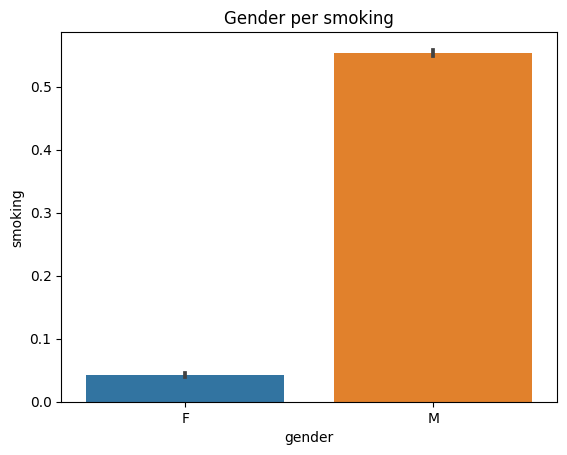

<Figure size 640x480 with 0 Axes>

In [187]:
#By eye, we can see that most smokers are men
sns.barplot(x='gender', y='smoking', data=df)
plt.title(f'Gender per smoking')
plt.show()
plt.clf()

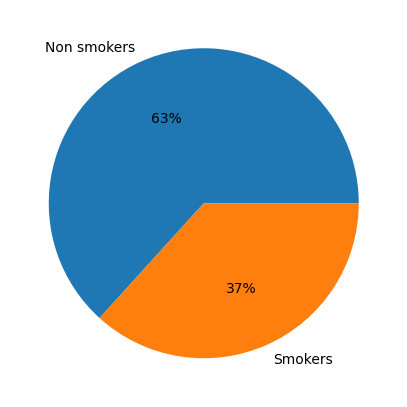

In [188]:
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(111)

data = df['smoking'].value_counts()
labels =['Non smokers','Smokers']

ax.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

Usunięcie "ID" oraz "oral" 

In [189]:
df.drop(["ID", "oral"], axis=1, inplace=True)

Statystki opisowe

In [190]:
df[df.columns].select_dtypes(int).describe()

,age,height(cm),weight(kg),dental_caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,0.213334,0.367288
std,12.071418,9.194597,12.820306,0.409665,0.482070
min,20.000000,130.000000,30.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,1.000000,1.000000


In [191]:
df[df.columns].select_dtypes(float).describe()

,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum_creatinine,AST,ALT,Gtp
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201
std,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539
min,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000
25%,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000
50%,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000
75%,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000
max,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000


Współczynnik zmienności

In [192]:
df["eyesight"] = (df["eyesight(left)"] + df["eyesight(right)"])/2.0
df["hearing"] = (df["hearing(left)"] + df["hearing(right)"])/2.0
df.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis = 1, inplace = True)

In [193]:
oe = OrdinalEncoder()
df[df.select_dtypes(include='object').columns.tolist()] = oe.fit_transform(df[df.select_dtypes(include='object').columns.tolist()]) 
oe.categories_

[array(['F', 'M'], dtype=object), array(['N', 'Y'], dtype=object)]

In [194]:
df.iloc[:, 1:].apply(lambda x: np.std(x)/np.mean(x))

age                    0.273212
height(cm)             0.055843
weight(kg)             0.194644
waist(cm)              0.113035
systolic               0.112564
relaxation             0.127350
fasting_blood_sugar    0.209394
Cholesterol            0.184344
triglyceride           0.565577
HDL                    0.257266
LDL                    0.355989
hemoglobin             0.106991
Urine protein          0.372401
serum_creatinine       0.250099
AST                    0.739233
ALT                    1.144679
Gtp                    1.258756
dental_caries          1.920282
tartar                 0.894427
smoking                1.312501
eyesight               0.396331
hearing                0.134450
dtype: float64

In [195]:
df.drop('height(cm)', axis = 1, inplace = True)

Korelacje, bez zmiennych gender oraz tartar, ponieważ są one typu object

In [196]:
numerical_features = df.select_dtypes([float, int]).columns
df[df[numerical_features]==0].count()

gender                 20291
age                        0
weight(kg)                 0
waist(cm)                  0
systolic                   0
relaxation                 0
fasting_blood_sugar        0
Cholesterol                0
triglyceride               0
HDL                        0
LDL                        0
hemoglobin                 0
Urine protein              0
serum_creatinine           0
AST                        0
ALT                        0
Gtp                        0
dental_caries          43811
tartar                 24752
smoking                35237
eyesight                   0
hearing                    0
dtype: int64

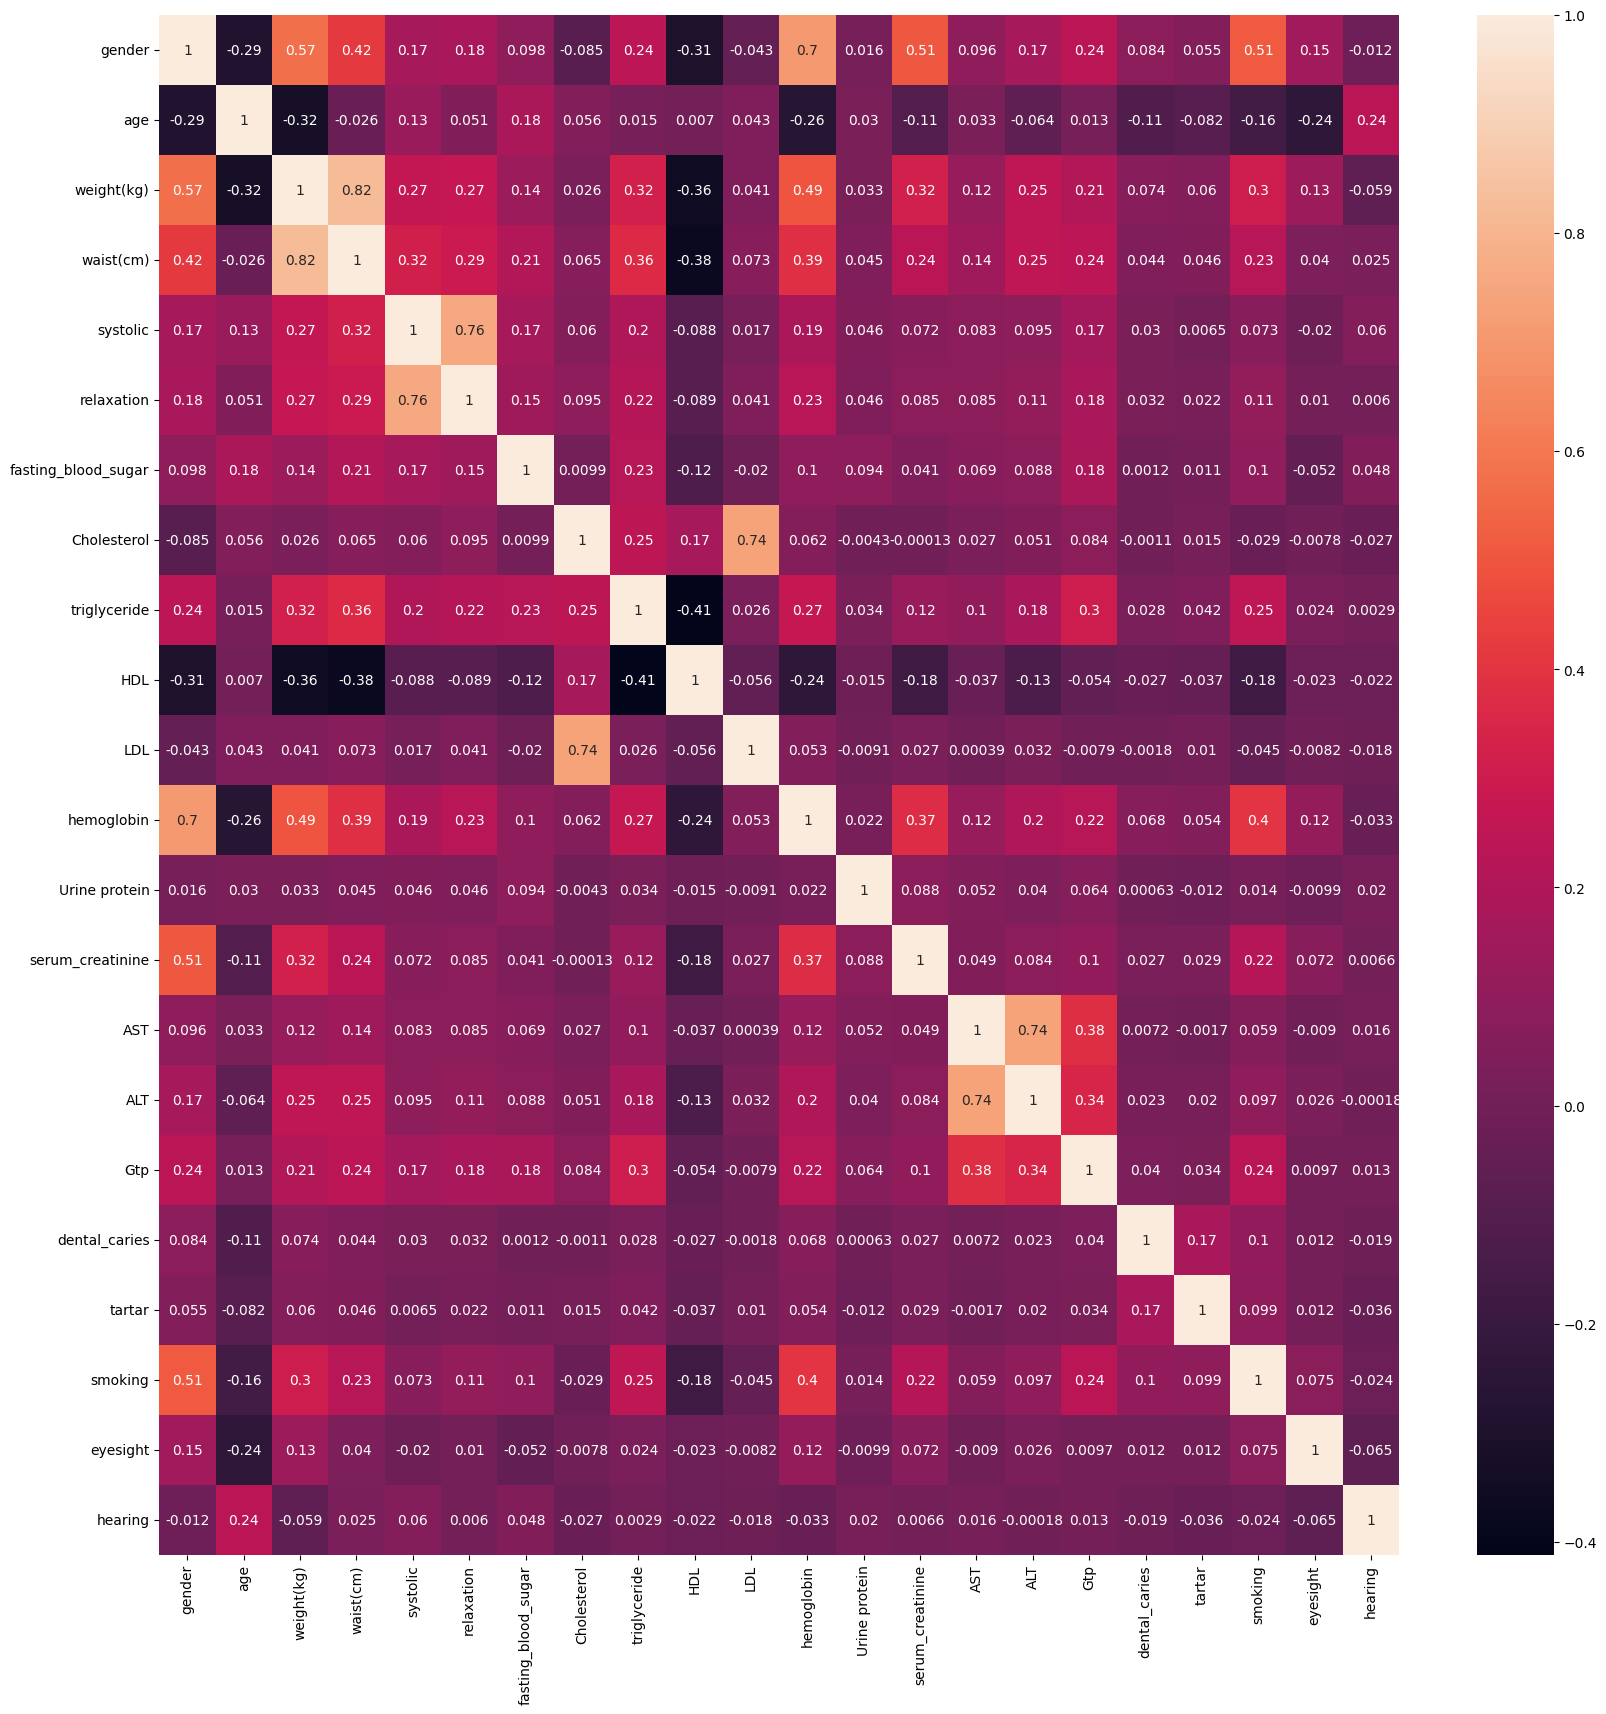

In [198]:
plt.figure(figsize= (20,20))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()
plt.clf()